Loading data...
Train: (25000, 500), Test: (25000, 500)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 159ms/step - acc: 0.5956 - loss: 0.6578 - val_acc: 0.6370 - val_loss: 0.6406
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - acc: 0.8007 - loss: 0.4472 - val_acc: 0.7794 - val_loss: 0.4813
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - acc: 0.8483 - loss: 0.3580 - val_acc: 0.7932 - val_loss: 0.4354
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - acc: 0.8879 - loss: 0.2810 - val_acc: 0.8292 - val_loss: 0.4526
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - acc: 0.9154 - loss: 0.2214 - val_acc: 0.8360 - val_loss: 0.3812
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - acc: 0.9381 - loss: 0.1709 - val_acc: 0.8586 - val_loss: 0.3991
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - acc: 0.9570 - loss: 0.1243 - val_acc: 0.8012 - val_loss: 0.5076
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - acc: 0.9743 - loss: 0.0793 - val_acc: 0.8032 - val_loss: 0.5288
Epoch 9/10
157/157 ━━━━━━━━━━━━━

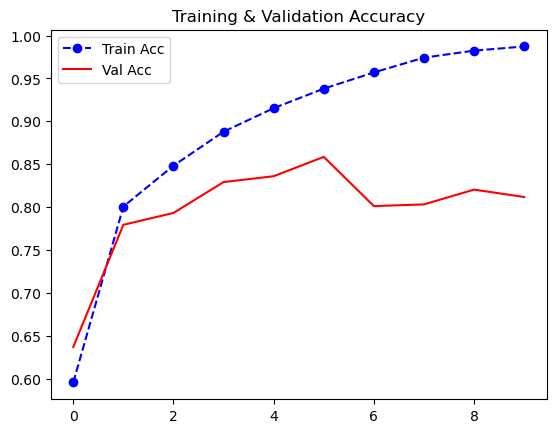

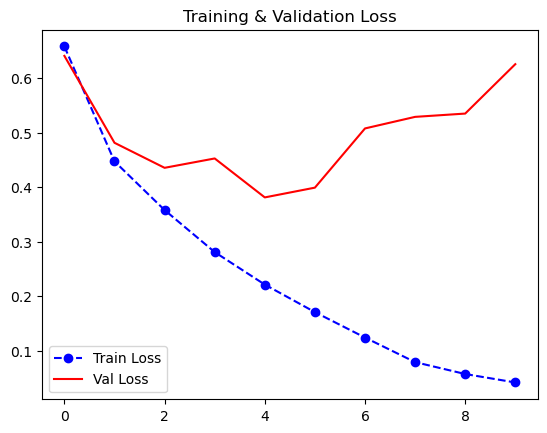

(<matplotlib.legend.Legend at 0x29ab58d8190>, None)

In [5]:
# RNN for Sentiment Analysis on IMDB Reviews
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load & preprocess data
max_features, maxlen = 10000, 500
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

# Build model
model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Predict & evaluate
pred = (model.predict(x_test) > 0.5).astype("int32").flatten()
print(classification_report(y_test, pred, target_names=["Negative", "Positive"]))

# Plot accuracy & loss
plt.plot(history.history['acc'], 'bo--', label='Train Acc')
plt.plot(history.history['val_acc'], 'r-', label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.legend(), plt.show()

plt.plot(history.history['loss'], 'bo--', label='Train Loss')
plt.plot(history.history['val_loss'], 'r-', label='Val Loss')
plt.title('Training & Validation Loss')
plt.legend(), plt.show()
